# Finance Engineering Report 2 Question 2
## Author Zhicheng Zhang

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from math import exp, log
%matplotlib inline

# parameters

In [2]:
u1 = 0.02
u2 = 0.05
sigma1 = 0.1
sigma2 = 0.3
r = 0.005
rho1 = 0.5
rho2 = -0.5
dt=1

# Covariance matrix for generating z1(t) and  z2(t)

In [3]:
# covariance of 2-D Gaussian distribution
cov1 = np.eye(2)
cov2 = np.eye(2)
cov1[0, 0] = sigma1*sigma1
cov1[1, 1] = sigma2*sigma2
cov1[0, 1] = rho1*sigma1*sigma2
cov1[1, 0] = rho1*sigma1*sigma2

cov2[0, 0] = sigma1*sigma1
cov2[1, 1] = sigma2*sigma2
cov2[0, 1] = rho2*sigma1*sigma2
cov2[1, 0] = rho2*sigma1*sigma2
print(" covariance matrix1 (rho = 0.5): \n", cov1)
print("\n covariance matrix2 (rho = -0.5):\n", cov2)

 covariance matrix1 (rho = 0.5): 
 [[0.01  0.015]
 [0.015 0.09 ]]

 covariance matrix2 (rho = -0.5):
 [[ 0.01  -0.015]
 [-0.015  0.09 ]]


# 2-D Gaussian_Distribution Function

In [4]:
def Gaussian_Distribution(N=2, M=1000, m=0, cov=cov1):
    '''
    Parameters
    ----------
    N Dimension
    M number of samples
    m mean
    sigma: variance
    
    Returns
    -------
    data  shape(M, N)
    Gaussian  
    '''
    mean = np.zeros(N) + m  # matrix of mean
 #   cov = np.eye(N) * sigma  # covariance matrix

    # generate N-dimension Gaussian distribution
    data = np.random.multivariate_normal(mean, cov, M)
    # density function
    Gaussian = multivariate_normal(mean=mean, cov=cov)
    
    return data, Gaussian

# Noise distribution (rho = 0.5)   z1(t) and z2(t))

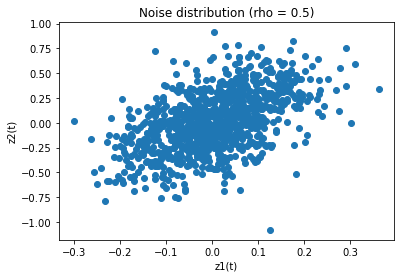

In [13]:
'''Noise(z1(t) and z2(t)) distribution (rho = 0.5)'''
data, _ = Gaussian_Distribution(N=2, M=1000, cov=cov1)
x, y = data.T
plt.scatter(x, y)
plt.xlabel("z1(t)")
plt.ylabel("z2(t)")
plt.title("Noise distribution (rho = 0.5)")
plt.show()

# Simulation Functions without weight balance

In [6]:
def sim1(u, sigma, u2, sigma2):
    S1 = [100] # price S1(t)
    R1 = []    # rate of return
    S2 = [100] # price S2(t)
    R2 = []    # rate of return
    for i in range(120):
        index = np.random.randint(1000)
        zt1 = x[index]           # generate z1(t)
        R1.append(u1*dt+sigma1*zt1*dt)
        S_forward1 = S1[i] * exp(R1[i])      # log(S[i+1] / S[i]) == R[i]
        S1.append(S_forward1)
        
        zt2 = y[index]           # generate z2(t)
        R2.append(u2*dt+sigma2*zt2*dt)
        S_forward2 = S2[i] * exp(R2[i])      # log(S[i+1] / S[i]) == R[i]
        S2.append(S_forward2)
    return R1, S1, R2, S2

# Simulation Results rho = 0.5, without weight balance

Text(0.5, 1.0, 'S(T) Distribution (without Balance) rho = 0.5')

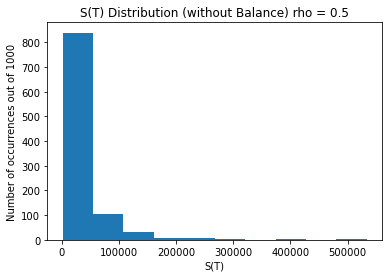

In [22]:
Price = []
for i in range(1000):
    R1, S1, R2, S2 = sim1(u1, sigma1, u2, sigma2)
    Price.append(0.5 * S1[-1] + 0.5 * S2[-1])
plt.hist(Price)
plt.xlabel("S(T)")
plt.ylabel("Number of occurrences out of 1000")
plt.title("S(T) Distribution (without Balance) rho = 0.5")

# Simulation Functions with weight balance

In [8]:
def sim2(u, sigma, u2, sigma2):
    w1 = 0.5     #ratio of S1 and S2
    w2 = 1-0.5
    S1 = [100] # price S1(t)
    R1 = []    # rate of return
    S2 = [100] # price S2(t)
    R2 = []    # rate of return
    for i in range(120):
        index = np.random.randint(1000)
        zt1 = x[index]           # generate z1(t)
        R1.append(u1*dt+sigma1*zt1*dt)
        S_forward1 = S1[i] * exp(R1[i])      # log(S[i+1] / S[i]) == R[i]
        S1.append(S_forward1)
        
        zt2 = y[index]           # generate z2(t)
        R2.append(u2*dt+sigma2*zt2*dt)
        S_forward2 = S2[i] * exp(R2[i])      # log(S[i+1] / S[i]) == R[i]
        S2.append(S_forward2)
        
        if(i != 119): 
            w1 = S_forward2 /(S_forward1 + S_forward2)
            w2 = 1- w1
    return R1, S1, R2, S2, w1, w2

# Simulation Results rho = 0.5, with weight balance

Text(0.5, 1.0, 'S(T) Distribution (weight Balance) rho = 0.5')

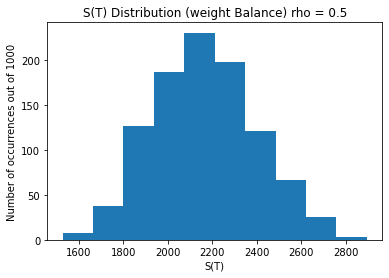

In [21]:
Price = []
for i in range(1000):
    R1, S1, R2, S2, w1, w2 = sim2(u1, sigma1, u2, sigma2)
    Price.append(w1 * S1[-1] + w2 * S2[-1])
plt.hist(Price)
plt.xlabel("S(T)")
plt.ylabel("Number of occurrences out of 1000")
plt.title("S(T) Distribution (weight Balance) rho = 0.5")

# Noise distribution (rho = 0.5) z1(t) and z2(t))

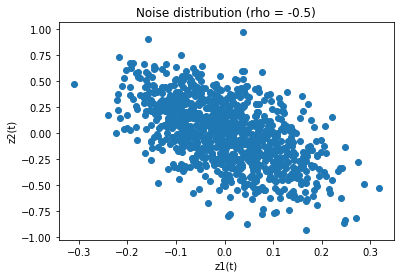

In [14]:
'''Noise(z1(t) and z2(t)) distribution (rho = -0.5)'''
data, _ = Gaussian_Distribution(N=2, M=1000, cov=cov2)
x, y = data.T
plt.scatter(x, y)
plt.xlabel("z1(t)")
plt.ylabel("z2(t)")
plt.title("Noise distribution (rho = -0.5)")
plt.show()

# Simulation Results rho = -0.5, without weight balance

Text(0.5, 1.0, 'S(T) Distribution (without Balance) rho = -0.5')

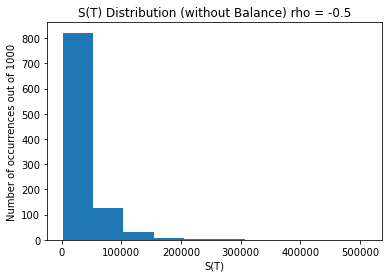

In [20]:
Price = []
for i in range(1000):
    R1, S1, R2, S2 = sim1(u1, sigma1, u2, sigma2)
    Price.append(0.5 * S1[-1] + 0.5 * S2[-1])
plt.hist(Price)
plt.xlabel("S(T)")
plt.ylabel("Number of occurrences out of 1000")
plt.title("S(T) Distribution (without Balance) rho = -0.5")

# Simulation Results rho = -0.5, with weight balance

Text(0.5, 1.0, 'S(T) Distribution (weight Balance) rho = -0.5')

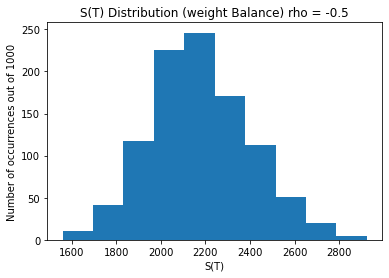

In [19]:
Price = []
for i in range(1000):
    R1, S1, R2, S2, w1, w2 = sim2(u1, sigma1, u2, sigma2)
    Price.append(w1 * S1[-1] + w2 * S2[-1])
plt.hist(Price)
plt.xlabel("S(T)")
plt.ylabel("Number of occurrences out of 1000")
plt.title("S(T) Distribution (weight Balance) rho = -0.5")